In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/My Drive/bigml_59c28831336c6604c800002a.csv"
bnk = pd.read_csv(path, sep=',')
bnk.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


0    0.855086
1    0.144914
Name: churn, dtype: float64


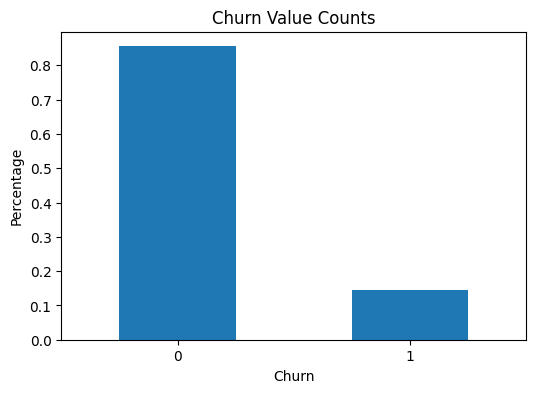

In [ ]:
print(bnk['churn'].value_counts(normalize=True))
normalized_counts = bnk['churn'].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
normalized_counts.plot(kind='bar')
plt.title('Churn Value Counts')
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

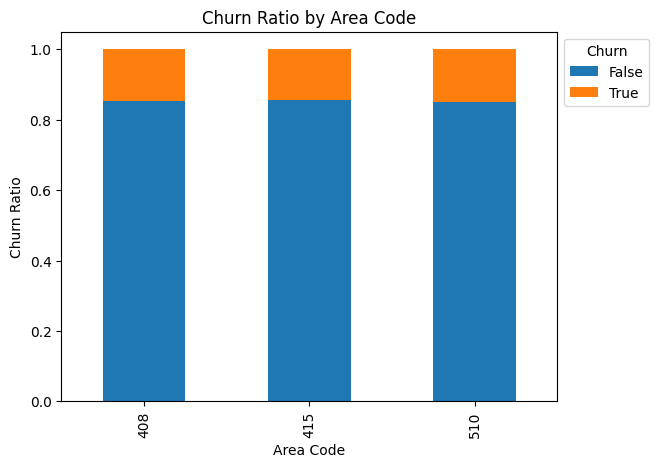

In [ ]:
area_churn_counts = bnk.groupby('area code')['churn'].value_counts().unstack()

area_churn_ratio = area_churn_counts.div(area_churn_counts.sum(axis=1), axis=0)

area_churn_ratio.plot(kind='bar', stacked=True)
plt.title('Churn Ratio by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Churn Ratio')
plt.legend(title='Churn', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
bnk.drop(["phone number","area code"], axis = 1, inplace=True)
bnk.head(10)

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [ ]:
bnk['international plan'] = bnk['international plan'].map({'no': 0, 'yes': 1})
bnk['voice mail plan'] = bnk['voice mail plan'].map({'no': 0, 'yes': 1})
bnk['churn'] = bnk['churn'].map({False: 0, True: 1})
bnk.head(10)

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [ ]:
bnk = pd.get_dummies(bnk, columns=['state'], prefix=['state'], drop_first=True)
bnk.head(10)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,...,0,0,0,0,0,0,0,0,0,0
6,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,0
7,147,1,0,0,157.0,79,26.69,103.1,94,8.76,...,0,0,0,0,0,0,0,0,0,0
8,117,0,0,0,184.5,97,31.37,351.6,80,29.89,...,0,0,0,0,0,0,0,0,0,0
9,141,1,1,37,258.6,84,43.96,222.0,111,18.87,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

std_col = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes',
                   'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                   'total intl calls', 'total intl charge', 'customer service calls']

bnk[std_col] = scaler.fit_transform(bnk[std_col])
bnk.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.676489,0,1,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,...,0,0,0,0,0,0,0,0,0,0
1,0.149065,0,1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,...,0,0,0,0,0,0,0,0,0,0
2,0.902529,0,0,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,...,0,0,0,0,0,0,0,0,0,0
3,-0.428590,1,0,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,...,0,0,0,0,0,0,0,0,0,0
4,-0.654629,1,0,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = bnk.churn
X = bnk.drop('churn', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=54)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_valid)

from sklearn.metrics import accuracy_score,r2_score, f1_score
print(f"Accuracy: {accuracy_score(y_valid, y_pred)}")
print(f"f1_score: {f1_score(y_valid, y_pred)}")

Accuracy: 0.848575712143928
f1_score: 0.2627737226277372


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_pred = log_reg.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y_valid, y_pred)
print(f"F1 Score: {f1}")

conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_valid, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.848575712143928
F1 Score: 0.2627737226277372
Confusion Matrix:
[[548  12]
 [ 89  18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       560
           1       0.60      0.17      0.26       107

    accuracy                           0.85       667
   macro avg       0.73      0.57      0.59       667
weighted avg       0.82      0.85      0.81       667



F1-мера є гармонічним середнім між точністю та повнотою. Значення навколо 0,26 свідчить про відносно низьку здатність моделі одночасно оптимізувати точність та повноту.

Верхній лівий квадрат (548) представляє кількість істинно від'ємних випадків (True Negatives, TN). Верхній правий квадрат (12) представляє кількість хибно позитивних випадків (False Positives, FP). Нижній лівий квадрат (89) представляє кількість хибно від'ємних випадків (False Negatives, FN). Нижній правий квадрат (18) представляє кількість істинно позитивних випадків (True Positives, TP).

Точність (Precision): Показує, скільки з передбачених позитивних випадків дійсно є позитивними. У даному випадку для класу 0 точність становить 0,86, а для класу 1 - 0,60. Повнота (Recall): Показує, скільки з дійсних позитивних випадків було передбачено моделлю. У даному випадку для класу 0 повнота становить 0,98, а для класу 1 - 0,17

macro avg (макро-усреднення)

Це середні значення для кожного класу, без врахування їх дисбалансу. У даному випадку, 0.73 - середній показник точності (precision), 0.57 - середній показник повноти (recall), і 0.59 - середній показник F1-мери для обох класів.

weighted avg (зважене усреднення)

Це зважені значення, які враховують дисбаланс класів. У даному випадку, 0.82 - зважений показник точності, 0.85 - зважений показник повноти, і 0.81 - зважений показник F1-мери. Зважені значення корисні в випадку, коли класи мають різну кількість прикладів, і це може впливати на усереднені метрики

По матриці помилок видно, що модель досить добре впорається з класифікацією екземплярів класу 0 (негативний клас), але в неї виникають труднощі з класифікацією екземплярів класу 1 (позитивний клас). Зокрема помітна кількість хибно від'ємних випадків (False Negatives) для класу 1.

Точність (Precision), Повнота (Recall) та F1-мера для кожного класу:

Для класу 0 (негативний клас) точність, повнота та F1-мера високі.
Для класу 1 (позитивний клас) точність менша, а повнота та F1-мера ще менше. Це вказує на те, що модель більше схильна до пропусків позитивних випадків (хибно від'ємні), що може бути критичним залежно від конкретного контексту задачі і може потребувати додаткової оптимізації

Lasso (L1-регуляризація)

In [ ]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression(solver='liblinear', penalty='l1')

C_values = {'C': np.logspace(-3, 3, 20)}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='f1')
logreg_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])},
             scoring='f1')

В этом процессе выполняется исчерпывающий поиск по заданным значениям гиперпараметра, оценивается производительность модели с использованием F1-меры и 5-кратной кросс-валидации

Указание диапазона значений для гиперпараметра C с использованием логарифмической шкалы (np.logspace(-3, 3, 20)). Гиперпараметр C является обратным значением силы регуляризации

In [ ]:
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)

{'C': 1000.0}
0.31356885452915095


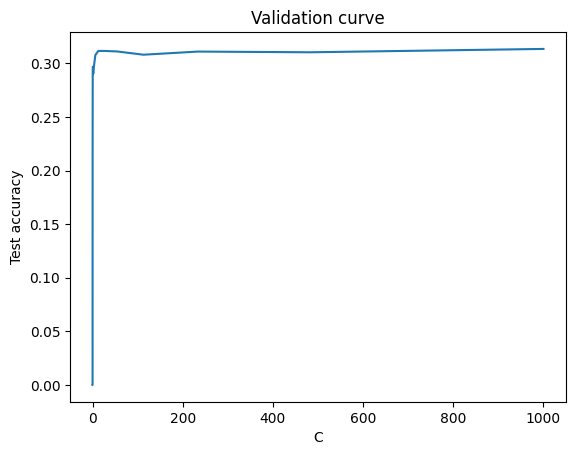

In [ ]:
import matplotlib.pyplot as plt
results_df = pd.DataFrame(logreg_grid.cv_results_)
plt.plot(results_df['param_C'], results_df['mean_test_score'])


plt.xlabel('C')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

Ridge (L2-регуляризація)

In [ ]:
log_reg_l2 = LogisticRegression(solver='liblinear', penalty='l2')

C_values = {'C': np.logspace(-3, 3, 20)}

logreg_l2_grid = GridSearchCV(log_reg_l2, C_values, cv=5, scoring='f1')

logreg_l2_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])},
             scoring='f1')

In [ ]:
print(logreg_l2_grid.best_params_)
print(logreg_l2_grid.best_score_)

{'C': 1000.0}
0.31356885452915095


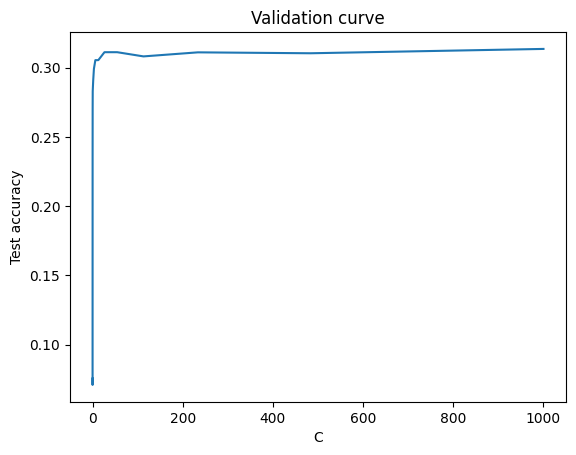

In [ ]:
results_df = pd.DataFrame(logreg_l2_grid.cv_results_)
plt.plot(results_df['param_C'], results_df['mean_test_score'])

plt.xlabel('C')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

ElasticNet

In [ ]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(solver='saga', penalty='elasticnet')

C_values = {'C': np.logspace(-3, 3, 20), "l1_ratio" : [0.1, 0.3, 0.5, 0.7, 0.9]}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='f1')
logreg_grid.fit(X_train, y_train)

In [ ]:
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)

{'C': 26.366508987303554, 'l1_ratio': 0.1}
0.31169584834799535


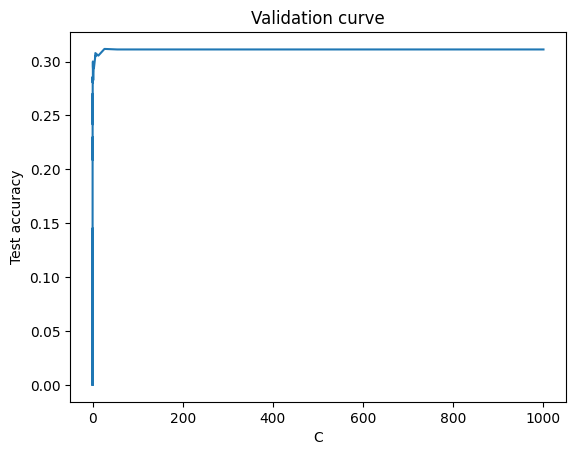

In [ ]:
results_df = pd.DataFrame(logreg_grid.cv_results_)
plt.plot(results_df['param_C'], results_df['mean_test_score'])

plt.xlabel('C')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

In [ ]:
log_reg_best = logreg_grid.best_estimator_
y_pred = log_reg_best.predict(X_valid)
print(f"Accuracy: {accuracy_score(y_valid, y_pred)}")
print(f"f1_score: {f1_score(y_valid, y_pred)}")

Accuracy: 0.848575712143928
f1_score: 0.2733812949640288


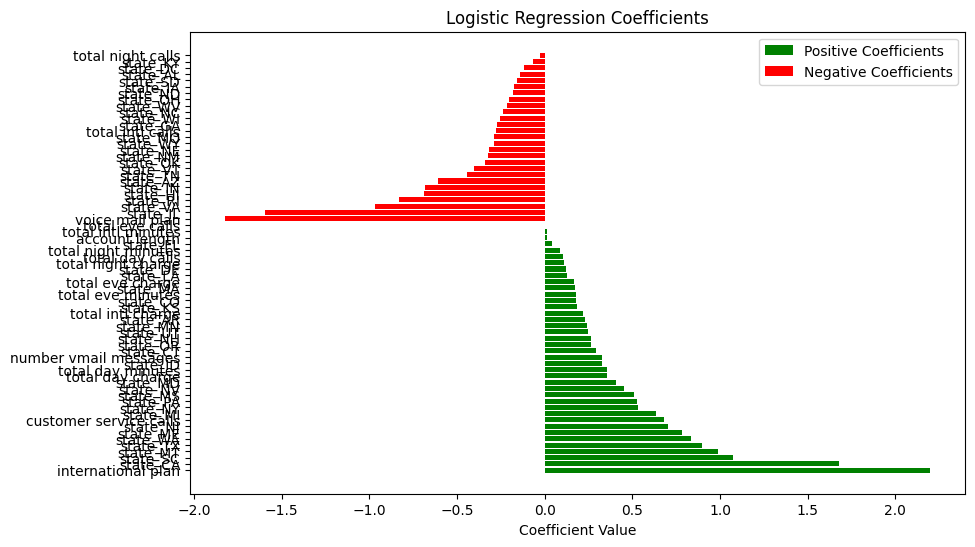

In [ ]:
import matplotlib.pyplot as plt

feature_names = X_train.columns
coefficients = log_reg_best.coef_[0]

coefficients_tuples = list(zip(feature_names, coefficients))

sorted_coefficients = sorted(coefficients_tuples, key=lambda x: abs(x[1]), reverse=True)

positive_coefficients = [coef[1] for coef in sorted_coefficients if coef[1] > 0]
negative_coefficients = [coef[1] for coef in sorted_coefficients if coef[1] < 0]
positive_features = [coef[0] for coef in sorted_coefficients if coef[1] > 0]
negative_features = [coef[0] for coef in sorted_coefficients if coef[1] < 0]

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(positive_features, positive_coefficients, color='green', label='Positive Coefficients')
ax.barh(negative_features, negative_coefficients, color='red', label='Negative Coefficients')
ax.set_xlabel('Coefficient Value')
ax.set_title('Logistic Regression Coefficients')
ax.legend()
plt.show()

In [ ]:
for feature, coef in sorted_coefficients:
    print(f"{feature}: {coef}")

international plan: 2.1974041198577527
voice mail plan: -1.8213358395379549
state_CA: 1.679206663055393
state_IL: -1.5969511900191133
state_SC: 1.0761501770187396
state_MT: 0.9907927423281763
state_VA: -0.9656176183873004
state_TX: 0.8990709140624741
state_WA: 0.834641970642656
state_RI: -0.8326069094258376
state_ME: 0.7815556144954735
state_NJ: 0.7027586356701531
state_HI: -0.6854283320937881
state_IN: -0.6849542663543586
customer service calls: 0.681212511143484
state_MI: 0.632813253683824
state_AZ: -0.6097347199117849
state_NY: 0.5328992673212946
state_PA: 0.5273889331916655
state_MS: 0.5079484109306197
state_NV: 0.45302339709038697
state_TN: -0.44327987732004387
state_MD: 0.4089582394836238
state_VT: -0.4016652342544553
total day charge: 0.35580733891402877
total day minutes: 0.3552831672903078
state_OK: -0.34267161632891346
state_ID: 0.3257772923129075
number vmail messages: 0.3252322203732378
state_NM: -0.32350565553335053
state_NE: -0.3150915227594695
state_CT: 0.292513683962128